In [35]:
%reset
%load_ext autoreload
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

from neurodsp import sim
from neurodsp import spectral

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 6
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']


Once deleted, variables cannot be recovered. Proceed (y/[n])? y
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
n_seconds = 2
fs = 1000
freq = 10.

noise_generator = 'synaptic'
noise_args = {'n_neurons':1000, 'firing_rate':5., 't_ker':2, 'tau_r':0.002, 'tau_d':0.02}


rdsym = 0.3
ratio_osc_var = 50
prob_enter_burst = 0.7
prob_leave_burst = 0.4

t = np.arange(0, n_seconds, 1/fs)
data = sim.sim_noisy_bursty_oscillator(n_seconds, fs, freq,
                                       noise_generator, noise_args,
                                       rdsym=rdsym,
                                       ratio_osc_var=ratio_osc_var,
                                       prob_enter_burst=prob_enter_burst,
                                       prob_leave_burst=prob_leave_burst)

# plt.plot(t, data)
# plt.show()

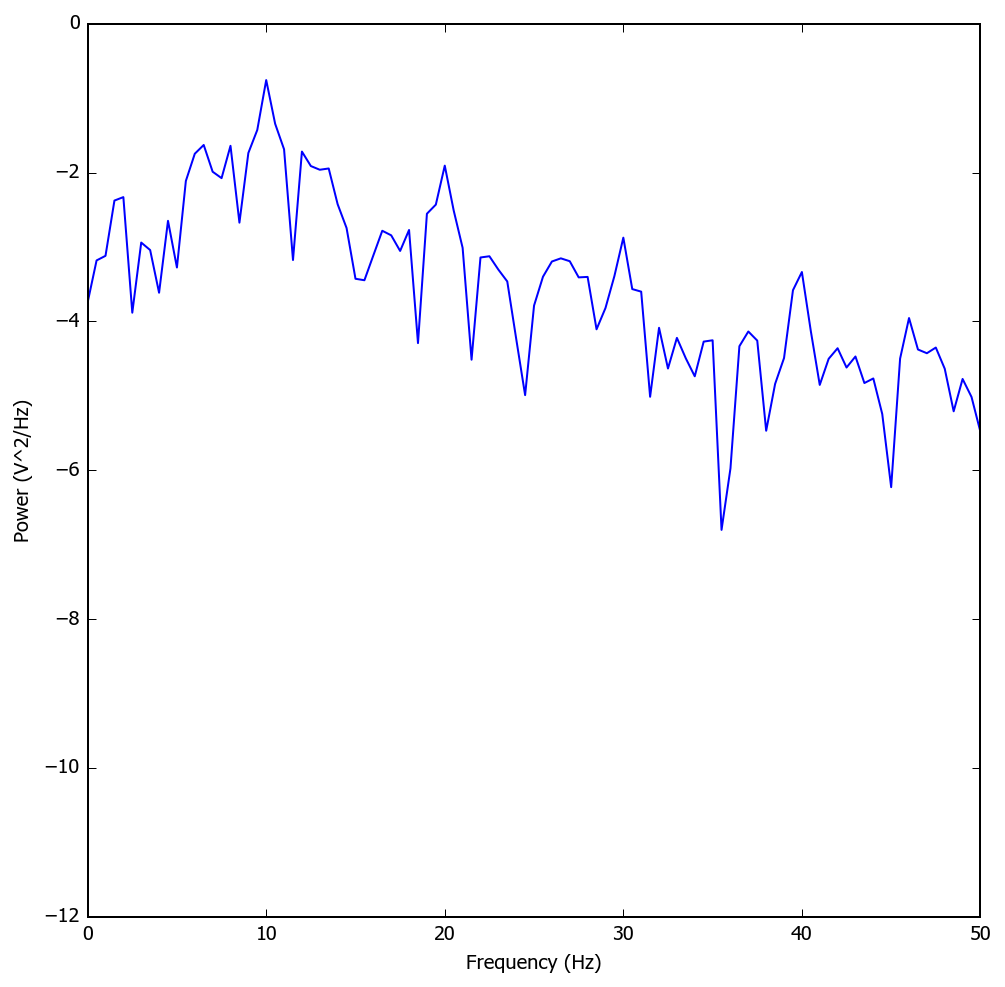

In [38]:
freq_mean, P_mean = spectral.compute_spectrum(data, fs, method='mean', window='hann', nperseg=fs*2, noverlap=0.5) # mean of spectrogram (Welch)
# This breaks the data up into two-second windows (nperseg=fs*2)
# It then applies a hanning window to the time-series windows (window='hann')
# It then FFTs each hanning'd window, and then averages all those FFTs (method='mean')

plt.figure(figsize=(8,8))
plt.plot(freq_mean, np.log10(P_mean))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((0, 50))
plt.show()

